In [15]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from numpy import fft

In [137]:
def display_image(A):
    fig,ax = plt.subplots(figsize=(10,5))
    ax.imshow(A)
    
    
def convolute(F,H):
    B = np.zeros((H.shape[0],H.shape[1],3), dtype=np.uint8)
    
    for i in range(len(F)):
        G = F[i]*H                # convolute for each channel
        f = fft.ifft2(G)          # obtain convoluted plane in the spatail domai
        f = np.abs(f).astype(int) # discard complex numbers
        B[:,:,i] = f
    
    return B

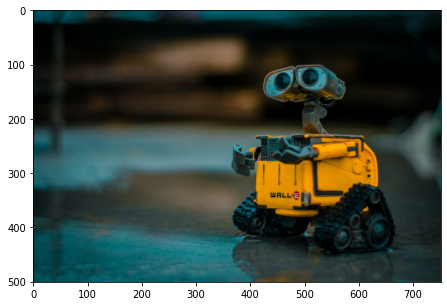

In [85]:
A = io.imread('images/robot.jpeg')

display_image(A)


#### Compute Ideal, Gaussian and Butterworth lowpass filters

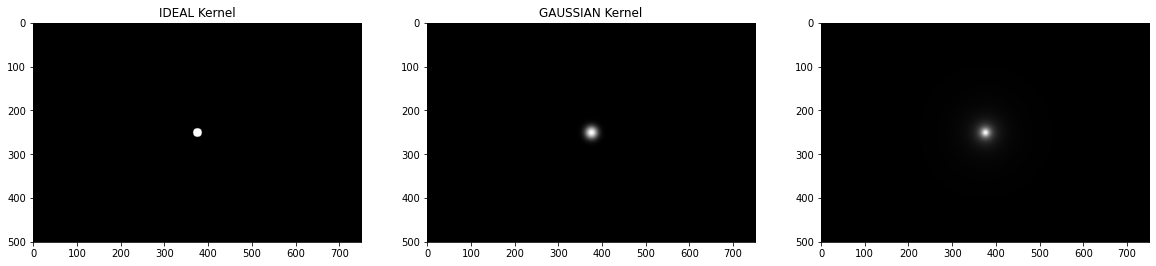

In [97]:
N,M = A.shape[0], A.shape[1]

kernel_a = np.zeros((N,M))
kernel_b = np.zeros((N,M))
kernel_c = np.zeros((N,M))

x,y = int(N/2), int(M/2)                                 # center

do = 10                                                  # cutoff frequency 
n = 1                                                    # order of BUTTERWORTH

for i in range(N):
    for j in range(M):
        distance = np.sqrt((x-i)**2 + (y-j)**2)           # distance from the center
        
        if (distance <= do):                              # IDEAL 
            kernel_a[i,j] = 1
            
        kernel_b[i,j] = np.exp(-(distance**2)/(2*do**2))  # GAUSSIAN 
        
        kernel_c[i,j] = 1/(1 + (distance/do)**(2*n))      # BUTTERWORTH 
        


fig,ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(kernel_a, 'gray')
ax[0].set_title("IDEAL Kernel")
ax[1].imshow(kernel_b, 'gray')
ax[1].set_title("GAUSSIAN Kernel")
ax[2].imshow(kernel_c, 'gray')

#### Convolute in the Fourier Domain

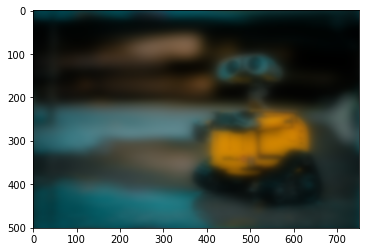

In [138]:
red_channel   = A[:,:,0]
green_channel = A[:,:,1]
blue_channel  = A[:,:,2]

F1 = fft.fft2(red_channel)
F2 = fft.fft2(green_channel)
F3 = fft.fft2(blue_channel)

# IDEAL CONVOLUTION
F = [F1, F2, F3]

A1 = convolute(F)


plt.imshow(B,'gray')